In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import requests

In [ ]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

In [ ]:
base_url = "https://www.bris.ac.uk/unit-programme-catalogue/FacultyUnits.jsa?selectedCatalogue=UNITS&ayrCode=25%2F26&orgCode=FSEN#atoz"

#Bypassing Error 403:
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
                  "AppleWebKit/537.36 (KHTML, like Gecko) "
                  "Chrome/122.0.0.0 Safari/537.36"
}

response = requests.get(base_url, headers = headers)


In [ ]:
soup = BeautifulSoup(response.content, 'html.parser')
type(soup)

bs4.BeautifulSoup

In [ ]:

#-----------------IGNORE FOR BRISTOL------------------------------------------

#Trying a loop to account for pagination:

modules = []
for x in range (0,15):
  base_url = f"https://courses.warwick.ac.uk/?keywords=&departments=CH&departments=CS&departments=PX&departments=ES&departments=WM&academicYears=2024&page={x}"
  html = urlopen(base_url)

  soup = BeautifulSoup(html, 'lxml')
  type(soup)

  warwick = soup.find_all('a', href=re.compile("modules"))
  warwick_urls = [a['href'] for a in warwick]

  modules.extend(warwick_urls)

#-----------------IGNORE FOR BRISTOL------------------------------------------


In [ ]:
modules = []
bristol = soup.find_all('a', href = re.compile("UnitDetails"))
bristol_urls = [a['href'] for a in bristol]
modules.extend(bristol_urls)

modules

['UnitDetails.jsa?ayrCode=25%2F26&unitCode=EENGM0037',
 'UnitDetails.jsa?ayrCode=25%2F26&unitCode=AENG10004',
 'UnitDetails.jsa?ayrCode=25%2F26&unitCode=CADE20005',
 'UnitDetails.jsa?ayrCode=25%2F26&unitCode=CADE30007',
 'UnitDetails.jsa?ayrCode=25%2F26&unitCode=AENGM0060',
 'UnitDetails.jsa?ayrCode=25%2F26&unitCode=CHEMM0048',
 'UnitDetails.jsa?ayrCode=25%2F26&unitCode=COMS30042',
 'UnitDetails.jsa?ayrCode=25%2F26&unitCode=CHEM30023',
 'UnitDetails.jsa?ayrCode=25%2F26&unitCode=CHEM30028',
 'UnitDetails.jsa?ayrCode=25%2F26&unitCode=CHEM30032',
 'UnitDetails.jsa?ayrCode=25%2F26&unitCode=CHEM30004',
 'UnitDetails.jsa?ayrCode=25%2F26&unitCode=CHEM30034',
 'UnitDetails.jsa?ayrCode=25%2F26&unitCode=PHYS30048',
 'UnitDetails.jsa?ayrCode=25%2F26&unitCode=PHYS30053',
 'UnitDetails.jsa?ayrCode=25%2F26&unitCode=COMSM0053',
 'UnitDetails.jsa?ayrCode=25%2F26&unitCode=COMS30047',
 'UnitDetails.jsa?ayrCode=25%2F26&unitCode=COMS30046',
 'UnitDetails.jsa?ayrCode=25%2F26&unitCode=EMATM0031',
 'UnitDeta

In [ ]:
len(modules)

687

In [ ]:
base_url1 = "https://www.bris.ac.uk/unit-programme-catalogue/"
links = []
for i in modules:
  links.append(base_url1 + i)

links

['https://www.bris.ac.uk/unit-programme-catalogue/UnitDetails.jsa?ayrCode=25%2F26&unitCode=EENGM0037',
 'https://www.bris.ac.uk/unit-programme-catalogue/UnitDetails.jsa?ayrCode=25%2F26&unitCode=AENG10004',
 'https://www.bris.ac.uk/unit-programme-catalogue/UnitDetails.jsa?ayrCode=25%2F26&unitCode=CADE20005',
 'https://www.bris.ac.uk/unit-programme-catalogue/UnitDetails.jsa?ayrCode=25%2F26&unitCode=CADE30007',
 'https://www.bris.ac.uk/unit-programme-catalogue/UnitDetails.jsa?ayrCode=25%2F26&unitCode=AENGM0060',
 'https://www.bris.ac.uk/unit-programme-catalogue/UnitDetails.jsa?ayrCode=25%2F26&unitCode=CHEMM0048',
 'https://www.bris.ac.uk/unit-programme-catalogue/UnitDetails.jsa?ayrCode=25%2F26&unitCode=COMS30042',
 'https://www.bris.ac.uk/unit-programme-catalogue/UnitDetails.jsa?ayrCode=25%2F26&unitCode=CHEM30023',
 'https://www.bris.ac.uk/unit-programme-catalogue/UnitDetails.jsa?ayrCode=25%2F26&unitCode=CHEM30028',
 'https://www.bris.ac.uk/unit-programme-catalogue/UnitDetails.jsa?ayrCode

In [ ]:
links_unique = dict.fromkeys(links)
print(list(links_unique))

['https://www.bris.ac.uk/unit-programme-catalogue/UnitDetails.jsa?ayrCode=25%2F26&unitCode=EENGM0037', 'https://www.bris.ac.uk/unit-programme-catalogue/UnitDetails.jsa?ayrCode=25%2F26&unitCode=AENG10004', 'https://www.bris.ac.uk/unit-programme-catalogue/UnitDetails.jsa?ayrCode=25%2F26&unitCode=CADE20005', 'https://www.bris.ac.uk/unit-programme-catalogue/UnitDetails.jsa?ayrCode=25%2F26&unitCode=CADE30007', 'https://www.bris.ac.uk/unit-programme-catalogue/UnitDetails.jsa?ayrCode=25%2F26&unitCode=AENGM0060', 'https://www.bris.ac.uk/unit-programme-catalogue/UnitDetails.jsa?ayrCode=25%2F26&unitCode=CHEMM0048', 'https://www.bris.ac.uk/unit-programme-catalogue/UnitDetails.jsa?ayrCode=25%2F26&unitCode=COMS30042', 'https://www.bris.ac.uk/unit-programme-catalogue/UnitDetails.jsa?ayrCode=25%2F26&unitCode=CHEM30023', 'https://www.bris.ac.uk/unit-programme-catalogue/UnitDetails.jsa?ayrCode=25%2F26&unitCode=CHEM30028', 'https://www.bris.ac.uk/unit-programme-catalogue/UnitDetails.jsa?ayrCode=25%2F26&

In [ ]:
bristol_rawdata = []
for i, url in enumerate(links_unique, start = 1):
    try:
        print(f"\n--- Scraping URL {i}: {url} ---")
        response = requests.get(url, headers = headers)
        page_soup = BeautifulSoup(response.content, "html.parser")
        header = page_soup.find("h2", string="Your learning on this unit")

#ChatGPT helped with the "skillstext" part!

        skillstext = []
        if header:
          for sibling in header.find_next_siblings():
            if sibling.name == "h2":
              break

            skillstext.append(sibling.get_text(strip = False))

        bristol_rawdata.extend(skillstext)

    except Exception as e:
        print (f"Failed to scrape {url}: {e}")


--- Scraping URL 1: https://www.bris.ac.uk/unit-programme-catalogue/UnitDetails.jsa?ayrCode=25%2F26&unitCode=EENGM0037 ---

--- Scraping URL 2: https://www.bris.ac.uk/unit-programme-catalogue/UnitDetails.jsa?ayrCode=25%2F26&unitCode=AENG10004 ---

--- Scraping URL 3: https://www.bris.ac.uk/unit-programme-catalogue/UnitDetails.jsa?ayrCode=25%2F26&unitCode=CADE20005 ---

--- Scraping URL 4: https://www.bris.ac.uk/unit-programme-catalogue/UnitDetails.jsa?ayrCode=25%2F26&unitCode=CADE30007 ---

--- Scraping URL 5: https://www.bris.ac.uk/unit-programme-catalogue/UnitDetails.jsa?ayrCode=25%2F26&unitCode=AENGM0060 ---

--- Scraping URL 6: https://www.bris.ac.uk/unit-programme-catalogue/UnitDetails.jsa?ayrCode=25%2F26&unitCode=CHEMM0048 ---

--- Scraping URL 7: https://www.bris.ac.uk/unit-programme-catalogue/UnitDetails.jsa?ayrCode=25%2F26&unitCode=COMS30042 ---

--- Scraping URL 8: https://www.bris.ac.uk/unit-programme-catalogue/UnitDetails.jsa?ayrCode=25%2F26&unitCode=CHEM30023 ---

--- Scr

In [ ]:
bristol_rawdata[:10]

['An overview of content',
 'The unit will cover topics as a series of learning modules, comprising: the fundamental knowledge of quantum information engineering (the distinction between bits and qubits; the Bloch sphere; one qubit and two qubit gates; superposition; entanglement, decoherence); waves and particles (interference; electrons and photons; diffraction and the 2 slit experiment, uncertainty principle); photonic quantum information (light on beam splitters, coalescence, photon detection, autocorrelation); quantum statics (wavefunctions, Hamiltonians, potential well, optical transitions); quantum dynamics (time-dependent Schrödinger equations), quantum platforms (photonic, semiconducting, superconducting, atoms, and ions), and quantum technologies (computation and simulation, communications; sensing, imaging).',
 'How will students, personally, be different as a result of the unit',
 'The students will become fluent in the language of quantum information engineering – unfazed 

In [ ]:
with open("bristol_modules.txt", "w") as f:
  f.write(str(bristol_rawdata))

In [ ]:
BRISTOL_textfile = open("bristol_modules.txt", "r", encoding = "utf-8")
bristoltext = BRISTOL_textfile.read()
print(bristoltext)

['An overview of content', 'The unit will cover topics as a series of learning modules, comprising: the fundamental knowledge of quantum information engineering (the distinction between bits and qubits; the Bloch sphere; one qubit and two qubit gates; superposition; entanglement, decoherence); waves and particles (interference; electrons and photons; diffraction and the 2 slit experiment, uncertainty principle); photonic quantum information (light on beam splitters, coalescence, photon detection, autocorrelation); quantum statics (wavefunctions, Hamiltonians, potential well, optical transitions); quantum dynamics (time-dependent Schrödinger equations), quantum platforms (photonic, semiconducting, superconducting, atoms, and ions), and quantum technologies (computation and simulation, communications; sensing, imaging).', 'How will students, personally, be different as a result of the unit', 'The students will become fluent in the language of quantum information engineering – unfazed by 

In [ ]:
%pip install nltk
%pip install gensim
%pip install wordcloud

import nltk
from nltk import word_tokenize
from nltk.corpus import SentimentIntensityAnalyser
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from gensim.corpora import Dictionary
from gensim.models import ldamodel
from gensim.models.coherencemodel import coherencemodel
from wordcloud import WordCloud

from PIL import Image
import random


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.6/26.6 MB 67.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 88.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.2/38.2 MB 14.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.1
    Uninstalling scipy-1.16.1:
      Successfully uninstalled scipy-1.16.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
opencv-contrib-python 4.12.0.88 requir

ImportError: cannot import name 'SentimentIntensityAnalyser' from 'nltk.corpus' (/usr/local/lib/python3.12/dist-packages/nltk/corpus/__init__.py)

In [ ]:
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("vader_lexicon")
nltk.download("wordnet")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
import nltk
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
wordcloud_text = bristoltext.lower()
wordcloud_text=re.sub("[^a-zA-Z0-9]", " ", wordcloud_text)
wordcloud_text

'  an overview of content    the unit will cover topics as a series of learning modules  comprising  the fundamental knowledge of quantum information engineering  the distinction between bits and qubits  the bloch sphere  one qubit and two qubit gates  superposition  entanglement  decoherence   waves and particles  interference  electrons and photons  diffraction and the 2 slit experiment  uncertainty principle   photonic quantum information  light on beam splitters  coalescence  photon detection  autocorrelation   quantum statics  wavefunctions  hamiltonians  potential well  optical transitions   quantum dynamics  time dependent schr dinger equations   quantum platforms  photonic  semiconducting  superconducting  atoms  and ions   and quantum technologies  computation and simulation  communications  sensing  imaging      how will students  personally  be different as a result of the unit    the students will become fluent in the language of quantum information engineering   unfazed by

In [ ]:
tokens = word_tokenize(wordcloud_text, language = "english")
tokens = (word for word in tokens if word not in stopwords.words("english"))
tokens = (word for word in tokens if len(word) >= 3)

In [ ]:
alphabets= "([A-Za-z])"
prefixes = "(Mr|St|Mrs|Ms|Dr)[.]"
suffixes = "(Inc|Ltd|Jr|Sr|Co)"
starters = "(Mr|Mrs|Ms|Dr|Prof|Capt|Cpt|Lt|He\s|She\s|It\s|They\s|Their\s|Our\s|We\s|But\s|However\s|That\s|This\s|Wherever)"
acronyms = "([A-Z][.][A-Z][.](?:[A-Z][.])?)"
websites = "[.](com|net|org|io|gov|edu|me)"
digits = "([0-9])"

text = " " + bristoltext + "  "
text = text.replace("\n"," ")
text = re.sub(prefixes,"\\1<prd>",text)
text = re.sub(websites,"<prd>\\1",text)
text = re.sub(digits + "[.]" + digits,"\\1<prd>\\2",text)
if "..." in text: text = text.replace("...","<prd><prd><prd>")
if "Ph.D" in text: text = text.replace("Ph.D.","Ph<prd>D<prd>")
text = re.sub("\s" + alphabets + "[.] "," \\1<prd> ",text)
text = re.sub(acronyms+" "+starters,"\\1<stop> \\2",text)
text = re.sub(alphabets + "[.]" + alphabets + "[.]" + alphabets + "[.]","\\1<prd>\\2<prd>\\3<prd>",text)
text = re.sub(alphabets + "[.]" + alphabets + "[.]","\\1<prd>\\2<prd>",text)
text = re.sub(" "+suffixes+"[.] "+starters," \\1<stop> \\2",text)
text = re.sub(" "+suffixes+"[.]"," \\1<prd>",text)
text = re.sub(" " + alphabets + "[.]"," \\1<prd>",text)
if "”" in text: text = text.replace(".”","”.")
if "\"" in text: text = text.replace(".\"","\".")
if "!" in text: text = text.replace("!\"","\"!")
if "?" in text: text = text.replace("?\"","\"?")
text = text.replace(".",".<stop>")
text = text.replace("?","?<stop>")
text = text.replace("!","!<stop>")
text = text.replace("<prd>",".")
words = text.split("<stop>")
words = [s.strip() for s in words]
words1 = pd.DataFrame(words)
words1.columns = ['word']

<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:16: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:16: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-4186780205.py:4: SyntaxWarning: invalid escape sequence '\s'
  starters = "(Mr|Mrs|Ms|Dr|Prof|Capt|Cpt|Lt|He\s|She\s|It\s|They\s|Their\s|Our\s|We\s|But\s|However\s|That\s|This\s|Wherever)"
/tmp/ipython-input-4186780205.py:16: SyntaxWarning: invalid escape sequence '\s'
  text = re.sub("\s" + alphabets + "[.] "," \\1<prd> ",text)


In [ ]:
print(len(words1))
print(words1.head(10))

4979
                                                word
0  ['An overview of content', 'The unit will cove...
1  ', 'How will students, personally, be differen...
2  They can identify the wide range of technologi...
3  They will be able to communicate this knowledg...
4  ', 'Learning Outcomes', 'At the end of the uni...
5  \n', 'An overview of content', 'The unit provi...
6  Students focus on specialist domains (e.g.\u20...
7  The project encourages iterative conceptual de...
8  Students will be trained in specific manufactu...
9  Students will bring together all aspects of th...


In [ ]:
from wordcloud import WordCloud


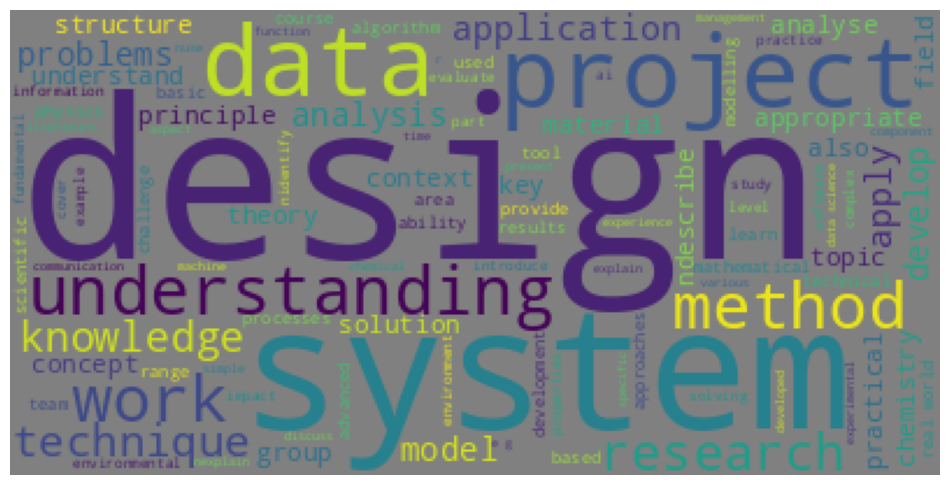

In [ ]:
stopwords_wc = set(stopwords.words("english"))
stopwords_wc.update(["well", "within", "end", "successful", "physical", "n", "include", "napply", "different", "personally", "unit", "using", "result", "overview", "content", "outcomes", "outcomeson", "module", "student", "able", "students", "learning", "outcome", "skills", "engineering", "including", "relevant", "use", "able", "completion", "broadly", "defined", "academic", "demonstrated", "following", "problem"])

wordcloud = WordCloud(background_color = "gray", mode = "RGBA", max_words = 100, stopwords = stopwords_wc, random_state = 1).generate(wordcloud_text)
plt.figure(figsize = (12,16))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
fdist = nltk.FreqDist(tokens)
fdist

FreqDist({})

In [ ]:
fdist.most_common(100)

AttributeError: 'generator' object has no attribute 'most_common'

<function matplotlib.pyplot.show(close=None, block=None)>

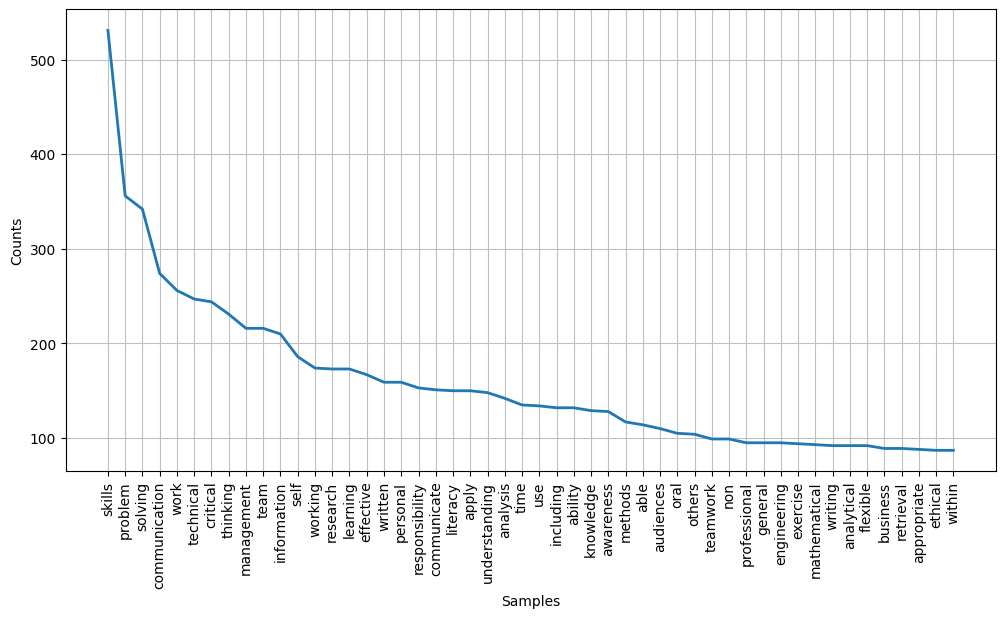

In [ ]:
plt.figure(figsize =(12,6))
fdist.plot(50, cumulative = False)
plt.show